# Task 1 — Exploratory Data Analysis (EDA)
This notebook performs the required EDA for the Financial News dataset.

### What this notebook covers:
- Load and inspect the dataset  
- Descriptive Statistics  
- Headline length analysis  
- Publisher activity analysis  
- Date trends and frequency  
- Simple keyword extraction (topic modeling)  
- Publisher domain analysis




In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re




In [7]:
df = pd.read_csv("C:/Users/Gerji/Desktop/projects/Financial Analysis/Financial-Analysis/data/raw_analyst_ratings.csv")

# Convert date column
df['date'] = pd.to_datetime(df['date'], format='mixed')


df.head()


C:\Users\Gerji\AppData\Local\Temp\ipykernel_9956\1185358035.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], format='mixed')


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 1. Descriptive Statistics
calculates:

- Headline length  
- Summary statistics  
- Publisher article counts  
- Daily publication frequencies  


In [8]:
df["headline_length"] = df["headline"].str.len()

print("Headline Length Statistics:")
df["headline_length"].describe()


Headline Length Statistics:


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [9]:
publisher_counts = df["publisher"].value_counts()

print("Top Publishers:")
publisher_counts.head(10)


Top Publishers:


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [12]:
df['date'].dtype


datetime64[ns, UTC-04:00]

In [13]:
df['date'] = df['date'].dt.tz_localize(None)


In [14]:
df['date'].dtype


dtype('<M8[ns]')

In [15]:
daily_counts = df.groupby(df["date"].dt.date).size()

print("Daily Article Counts:")
daily_counts.head()


Daily Article Counts:


date
2020-05-22    26
2020-05-26    28
2020-06-03    56
2020-06-05    62
dtype: int64

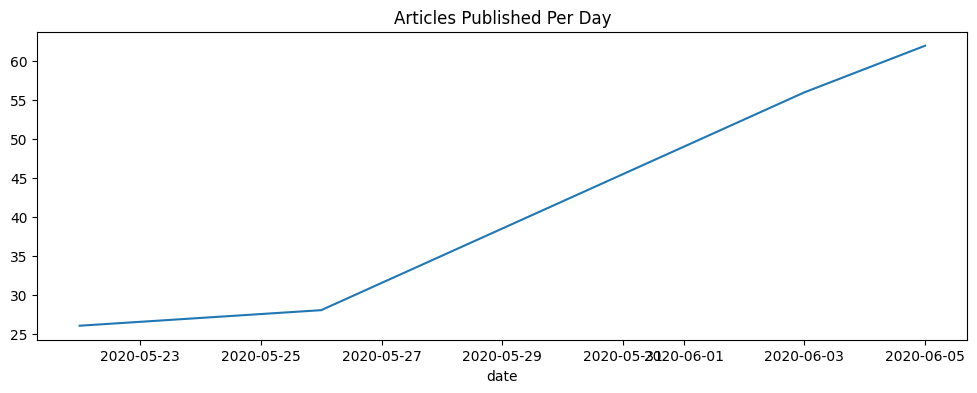

In [16]:
daily_counts.plot(figsize=(12,4), title="Articles Published Per Day")
plt.show()


## 2. Text Analysis (Simple Topic Modeling)
Extract the most common words from the headlines.
This helps identify major themes or keywords.


In [17]:
all_text = " ".join(df["headline"]).lower()

words = re.findall(r"[a-zA-Z]{3,}", all_text)

Counter(words).most_common(20)


[('for', 239920),
 ('the', 213326),
 ('stocks', 161776),
 ('est', 140650),
 ('eps', 128917),
 ('from', 120807),
 ('market', 120560),
 ('shares', 114315),
 ('and', 113931),
 ('reports', 108711),
 ('update', 91723),
 ('earnings', 87399),
 ('with', 84258),
 ('sales', 79648),
 ('top', 79633),
 ('benzinga', 74516),
 ('week', 69572),
 ('announces', 66591),
 ('price', 64407),
 ('buy', 64374)]

## 3. Time Series Analysis
Examined:
- Publication trends
- Frequency over time


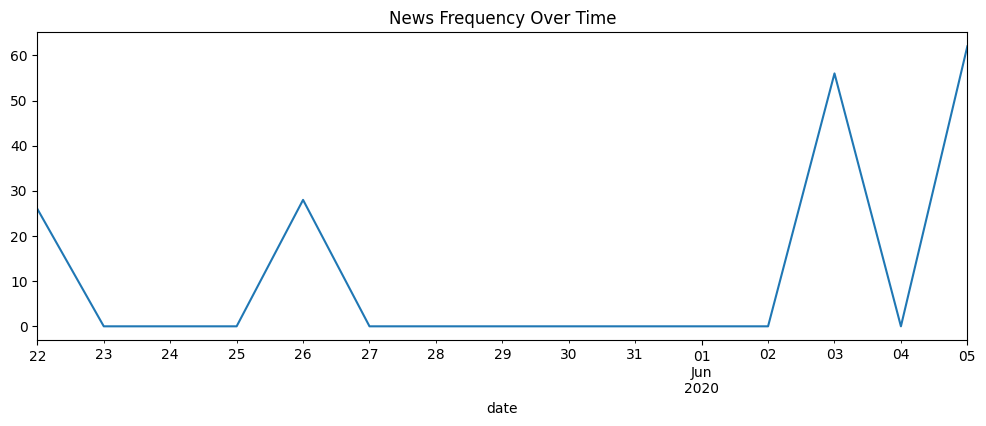

In [18]:
df.set_index("date")["headline"].resample("D").count().plot(figsize=(12,4), title="News Frequency Over Time")
plt.show()


## 4. Publisher Domain Analysis
If publishers include email addresses, we extract the domain.


In [19]:
df["publisher_domain"] = df["publisher"].str.split("@").str[-1]

df["publisher_domain"].value_counts().head(10)


publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64